<a href="https://colab.research.google.com/github/nefetorve/big_data/blob/master/07_uczenie_glebokie/1_siec_neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
%tensorflow_version 2.x

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.3.0


In [101]:
(X_train, y_train), (X_test, y_test )= load_data()

In [102]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [103]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [104]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [105]:
X_train = X_train /255.
X_test = X_test /255.

(-0.5, 27.5, 27.5, -0.5)

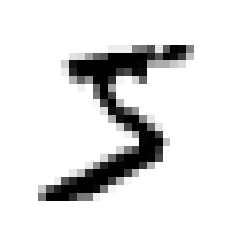

In [106]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

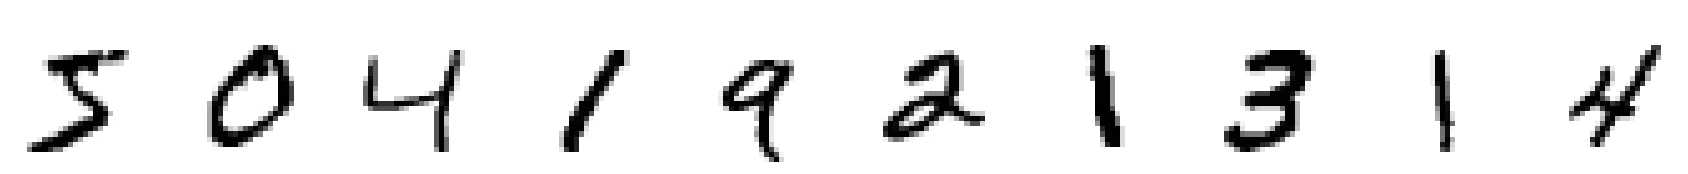

In [107]:
plt.figure(figsize=(30,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1],cmap='gray_r')
  plt.title(y_train[i-1], color='white', fontsize=16)

plt.show()

In [108]:
model = Sequential() #instancja modelu
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax')) #warstwa wynikowa - 10 klas - softmax (prawdopodobieństwo poszczególnej klasy)


In [109]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9817
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.043

In [111]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0678 - accuracy: 0.9796


[0.0677606612443924, 0.9796000123023987]

In [112]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293998,0.915917
1,0.140739,0.958783
2,0.107030,0.967500
3,0.085674,0.973517
4,0.074437,0.977100
5,0.064490,0.979600
6,0.057082,0.981700
7,0.051214,0.983567
8,0.048068,0.984700
9,0.043919,0.985717


In [113]:
print(history)

In [114]:
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1,col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2,col=1)
fig.update_layout(width=800, height=400)


In [115]:
model.predict(X_test)

array([[0.000000000381, 0.000000000001, 0.00000001789 , ..., 0.9999932     , 0.000000000047, 0.00000001426 ],
       [0.000000000061, 0.000000290071, 0.9999975     , ..., 0.            , 0.000000298982, 0.            ],
       [0.000000017901, 0.99949753    , 0.000015189055, ..., 0.00020722237 , 0.0002654181  , 0.000000003588],
       ...,
       [0.            , 0.            , 0.            , ..., 0.00000017484 , 0.00000001728 , 0.000000201058],
       [0.000000000859, 0.000000000026, 0.000000000001, ..., 0.00000000027 , 0.000030780062, 0.000000000003],
       [0.000000000078, 0.            , 0.000000000047, ..., 0.            , 0.000000000001, 0.            ]],
      dtype=float32)

In [117]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [121]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [122]:
 misclassified = pred[pred['y_test'] != pred['y_pred']]

 misclassified.index[:10]

Int64Index([247, 274, 321, 340, 381, 444, 449, 495, 582, 610], dtype='int64')

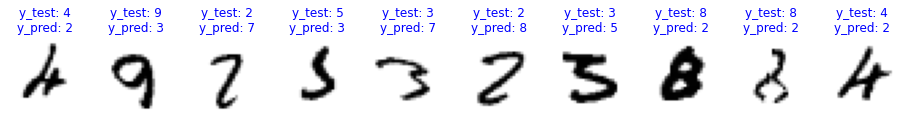

In [126]:
plt.figure(figsize=(16,16))
for i,j in zip(range(1,11), misclassified.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_test[j],cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}',color='blue',fontsize=12)